##Импорт библиотек и загрузка данных

In [ ]:
# из библиотеки google.colab импортируем класс files
from google.colab import files

# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving updated_data_with_coords_22_10_2023.csv to updated_data_with_coords_22_10_2023.csv


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("updated_data_with_coords_22_10_2023.csv", sep=",")

##Матрица корреляции

In [ ]:
df_new = df.drop(['Unnamed: 0','id'], axis=1)

<ipython-input-10-554258f2adb1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_new.corr() # матрица корреляций


<Axes: >

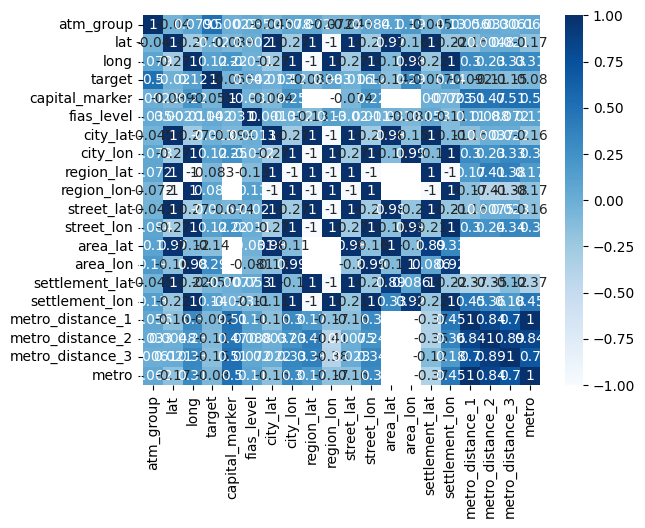

In [ ]:
corr = df_new.corr() # матрица корреляций

sns.heatmap(corr, cmap="Blues", annot=True)

##Анализ даных по 'atm_group'

In [ ]:
df.groupby('atm_group').count()[['id']]

,id
atm_group,
32.0,43
496.5,616
1022.0,136
1942.0,1160
3185.5,594
5478.0,2662
8083.0,1050


In [ ]:
df.groupby(by='atm_group')[['target']].mean()

,target
atm_group,
32.0,0.008198
496.5,-0.047669
1022.0,-0.089226
1942.0,0.004272
3185.5,-0.043811
5478.0,-0.034487
8083.0,0.150946


<Axes: title={'center': 'target'}, xlabel='atm_group'>

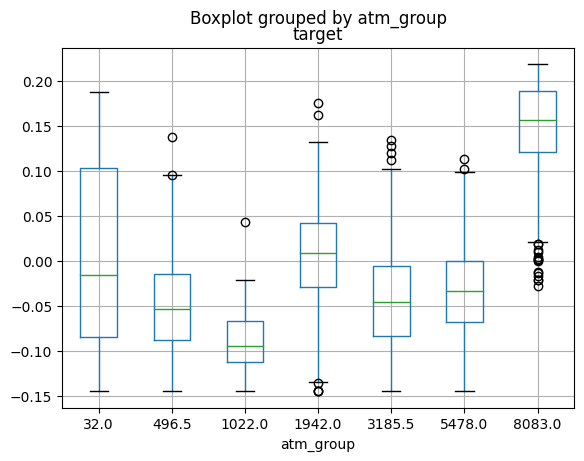

In [ ]:
df.boxplot(column=['target'],by='atm_group')

In [ ]:
import numpy as np

columns_to_show = ['target']

df.groupby(['atm_group'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

target                              
               mean       std      amin      amax
atm_group                                        
32.0       0.008198  0.106251 -0.145001  0.187148
496.5     -0.047669  0.051260 -0.145001  0.137125
1022.0    -0.089226  0.034243 -0.145001  0.043012
1942.0     0.004272  0.051111 -0.145001  0.175757
3185.5    -0.043811  0.054739 -0.145001  0.134733
5478.0    -0.034487  0.047057 -0.145001  0.112885
8083.0     0.150946  0.048439 -0.027398  0.218608

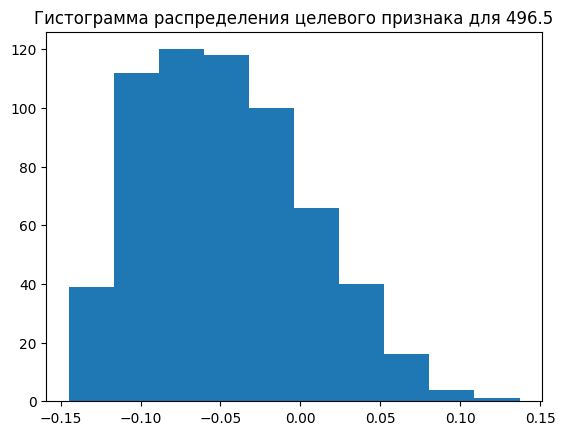

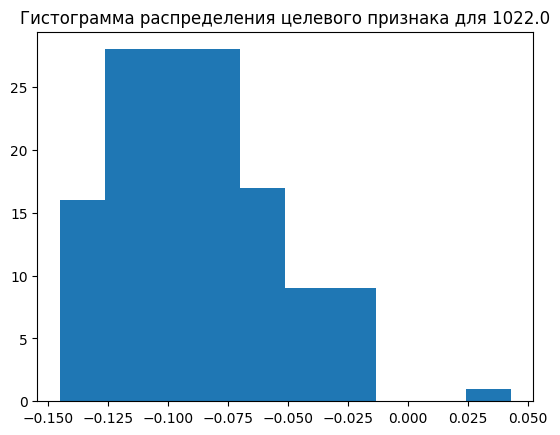

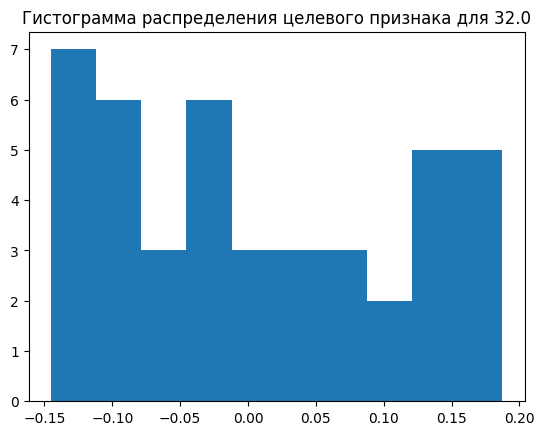

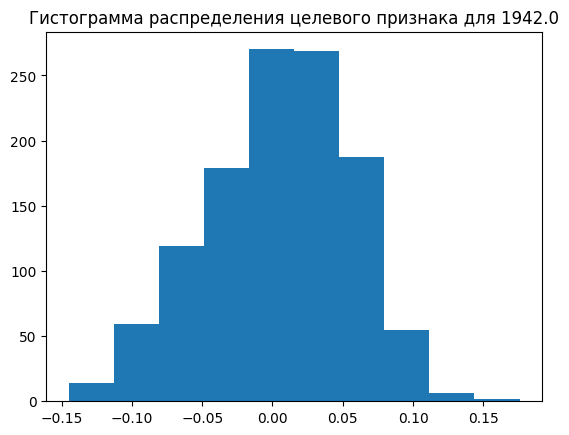

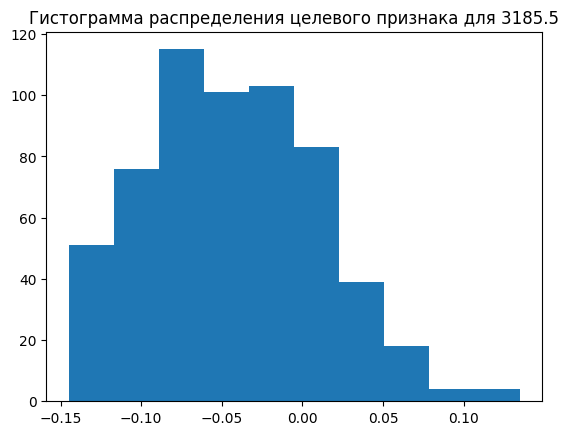

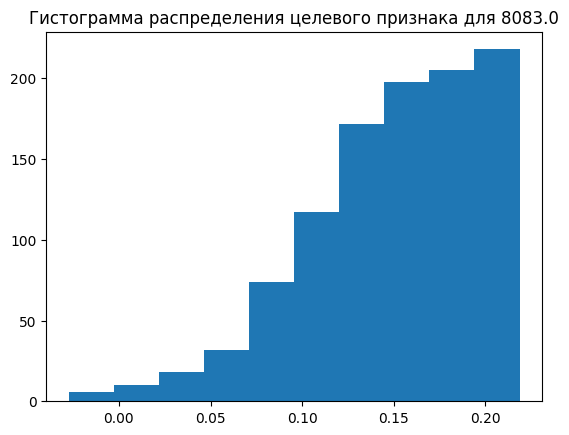

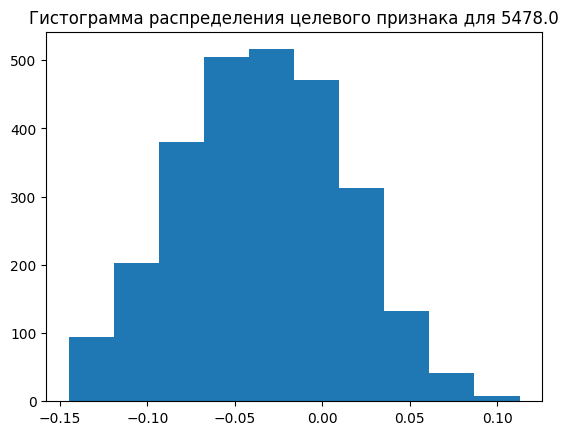

In [ ]:
# импорт библиотек для графиков
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

atm_groups = df['atm_group'].unique()

for atm_group in atm_groups:
  filtered_data = df[df['atm_group']==atm_group]
  plt.hist(filtered_data['target'], bins=10)
  plt.title(f'Гистограмма распределения целевого признака для {atm_group}')
  plt.show()


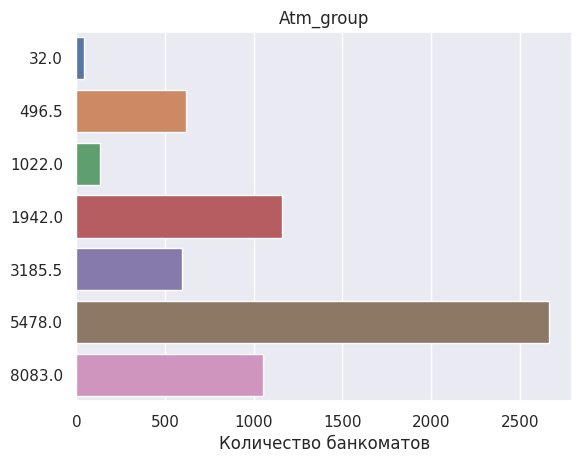

In [ ]:
sns.set()

fig, ax = plt.subplots()
ax = sns.countplot(y='atm_group', data=df)
ax.set_title('Atm_group')
ax.set_ylabel('')

ax.set(xlabel='Количество банкоматов')


plt.show()